In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('verdict_110.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df

字號  \
0   臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決   
1    臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決   
2    臺灣臺中地方法院 110 年度 簡 字第 73 號民事判決   
3    臺灣橋頭地方法院 110 年度 簡 字第 48 號民事裁定   
4    臺灣橋頭地方法院 110 年度 簡 字第 14 號民事判決   
..                             ...   
76  臺灣嘉義地方法院 110 年度 全事聲 字第 2 號民事裁定   
77   臺灣嘉義地方法院 110 年度 聲 字第 29 號民事裁定   
78    臺灣橋頭地方法院 110 年度 簡 字第 2 號民事判決   
79     最高法院 110 年度 台上 字第 325 號民事判決   
80   臺灣新竹地方法院 110 年度 竹簡 字第 8 號民事判決   

                                        main_text_raw  \
0   <html lang="zh-TW"><head><meta content="text/h...   
1   <html lang="zh-TW"><head><style type="text/css...   
2   <html lang="zh-TW"><head><style type="text/css...   
3   <html lang="zh-TW"><head><meta content="text/h...   
4   <html lang="zh-TW"><head><meta content="text/h...   
..                                                ...   
76  <html lang="zh-TW"><head><meta content="text/h...   
77  <html lang="zh-TW"><head><meta content="text/h...   
78  <html lang="zh-TW"><head><meta content="text/h...   
79  <html lang="zh-TW"><head><meta content="text/h...   
80  <html lang="zh-TW"><head><style type="text/css...   

                                                 裁判日期  \
0   <div class="col-td">\n                    民國 1...   
1   <div class="col-td">\n                    民國 1...   
2   <div class="col-td">\n                    民國 1...   
3   <div class="col-td">\n                    民國 1...   
4   <div class="col-td">\n                    民國 1...   
..                                                ...   
76  <div class="col-td">\n                    民國 1...   
77  <div class="col-td">\n                    民國 1...   
78  <div class="col-td">\n                    民國 1...   
79  <div class="col-td">\n                    民國 1...   
80  <div class="col-td">\n                    民國 1...   

                                                 裁判案由 district   字別    判別  
0   <div class="col-td">\n                    損害賠償...       臺中    簡  民事判決  
1   <div class="col-td">\n                    損害賠償...       臺中    簡  民事判決  
2   <div class="col-td">\n                    損害賠償...       臺中    簡  民事判決  
3   <div class="col-td">\n                    損害賠償...       橋頭    簡  民事裁定  
4   <div class="col-td">\n                    損害賠償...       橋頭    簡  民事判決  
..                                                ...      ...  ...   ...  
76  <div class="col-td">\n                    聲明異議...       嘉義  全事聲  民事裁定  
77  <div class="col-td">\n                    限期起訴...       嘉義    聲  民事裁定  
78  <div class="col-td">\n                    損害賠償...       橋頭    簡  民事判決  
79  <div class="col-td">\n                    請求侵權...     最高法院   台上  民事判決  
80  <div class="col-td">\n                    損害賠償...       新竹   竹簡  民事判決  

[81 rows x 7 columns]

In [ ]:
soup_panel = BeautifulSoup(df.main_text[0], 'lxml') #先挑第一篇來看

In [ ]:
soup_panel.prettify

<bound method Tag.prettify of <html lang="zh-TW"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="NO-CACHE" http-equiv="CACHE-CONTROL"/>
<meta content="https://law.judicial.gov.twfblogo.png" property="og:image"/>
<title>
	臺灣臺中地方法院 110 年簡字第 119 號民事判決
</title><link href="../css/bootstrap.min.css" rel="stylesheet"/><link href="../css/font-awesome.min.css" rel="stylesheet"/><link href="../css/iframe.css" rel="stylesheet"/>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="/js/jquery-3.2.1.min.js" type="text/javascript"></script>
<script src="/js/isMobile.js" type="text/javascript"></script>
<!--引用司法院內網的網頁字型 javascript -->
<script src="https://tpjwebfont2.judicial.gov.tw/WebFont/cmexwebfont.js" type="text/javascript"></script>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-100643133-1"></script>
<script>
        w

# 能直接提取的info.

In [ ]:
title = soup_panel.title

In [ ]:
title

<title>
	臺灣臺中地方法院 110 年簡字第 119 號民事判決
</title>

In [ ]:
soup_panel.find_all(name = "div", attrs = {"class":"col-td"})[0]

<div class="col-td">
                    臺灣臺中地方法院 110 年簡字第 119 號民事判決</div>

In [ ]:
soup_panel.find_all(name = "div", attrs = {"class":"col-td"})[1]

<div class="col-td">
                    民國 110 年 03 月 31 日</div>

In [ ]:
soup_panel.find_all(name = "div", attrs = {"class":"col-td"})[2]

<div class="col-td">
                    損害賠償
                </div>

In [ ]:
xx = []
for text in df.main_text:
    soup_panel = BeautifulSoup(text, 'lxml')
    
    title = soup_panel.title
    date = soup_panel.find_all(name = "div", attrs = {"class":"col-td"})[1]
    category = soup_panel.find_all(name = "div", attrs = {"class":"col-td"})[2]
    xx.append([title,date,category])

In [ ]:
df_xx = pd.DataFrame(xx,columns = ['title', 'jud_date', 'category'])

In [ ]:
districts = ["南投","嘉義","基隆","士林","宜蘭","屏東","彰化","新北","新竹","桃園","橋頭",
             "澎湖","臺中","臺北","臺南","臺東","花蓮","苗栗",'連江','金門','雲林','高雄',
             '最高法院']
xxx = []
for i in df.title:
    
    for j in districts:
        district == None
        if j in str(i):
            district = j
    xxx.append(district)

In [ ]:
xxx = pd.DataFrame(xxx)
df_xx = pd.concat([df_xx,xxx],axis = 1)

In [ ]:
df_xx.columns = ['title', 'jud_date', 'category','district']

In [ ]:
df_xx.head()

title  \
0  [\n\t臺灣臺中地方法院 110 年簡字第 119 號民事判決\n]   
1   [\n\t臺灣臺中地方法院 110 年簡字第 23 號民事判決\n]   
2   [\n\t臺灣臺中地方法院 110 年簡字第 73 號民事判決\n]   
3   [\n\t臺灣橋頭地方法院 110 年簡字第 48 號民事裁定\n]   
4   [\n\t臺灣橋頭地方法院 110 年簡字第 14 號民事判決\n]   

                                     jud_date  \
0  [\n                    民國 110 年 03 月 31 日]   
1  [\n                    民國 110 年 03 月 31 日]   
2  [\n                    民國 110 年 03 月 30 日]   
3  [\n                    民國 110 年 03 月 29 日]   
4  [\n                    民國 110 年 03 月 29 日]   

                                          category district  
0   [\n                    損害賠償\n                ]       臺中  
1   [\n                    損害賠償\n                ]       臺中  
2  [\n                    損害賠償等\n                ]       臺中  
3   [\n                    損害賠償\n                ]       橋頭  
4   [\n                    損害賠償\n                ]       橋頭

In [ ]:
list_type = []
for i in df_xx.title:
    iter_nian = re.finditer('年', str(i))
    indice_nian = [m.start(0) for m in iter_nian]
    iter_zi = re.finditer('字', str(i))
    indice_zi = [m.start(0) for m in iter_zi]
    list_type.append(str(i)[indice_nian[0]+1:indice_zi[0]])

In [ ]:
list_jud_type = []
for i in df_xx.title:
    iter_hao = re.finditer('號', str(i))
    indice_hao = [m.start(0) for m in iter_hao]
    list_jud_type.append(str(i)[indice_hao[0]+1:indice_hao[0]+5])

In [ ]:
j_type = pd.DataFrame(list_type)
jud_type = pd.DataFrame(list_jud_type)
df_xx = pd.concat([df_xx,j_type,jud_type],axis = 1)

In [ ]:
df_xx.columns = ['title', '裁判日期', '裁判案由','district', '字別','判別']
df_xx.head()

title  \
0  [\n\t臺灣臺中地方法院 110 年簡字第 119 號民事判決\n]   
1   [\n\t臺灣臺中地方法院 110 年簡字第 23 號民事判決\n]   
2   [\n\t臺灣臺中地方法院 110 年簡字第 73 號民事判決\n]   
3   [\n\t臺灣橋頭地方法院 110 年簡字第 48 號民事裁定\n]   
4   [\n\t臺灣橋頭地方法院 110 年簡字第 14 號民事判決\n]   

                                         裁判日期  \
0  [\n                    民國 110 年 03 月 31 日]   
1  [\n                    民國 110 年 03 月 31 日]   
2  [\n                    民國 110 年 03 月 30 日]   
3  [\n                    民國 110 年 03 月 29 日]   
4  [\n                    民國 110 年 03 月 29 日]   

                                              裁判案由 district 字別    判別  
0   [\n                    損害賠償\n                ]       臺中  簡  民事判決  
1   [\n                    損害賠償\n                ]       臺中  簡  民事判決  
2  [\n                    損害賠償等\n                ]       臺中  簡  民事判決  
3   [\n                    損害賠償\n                ]       橋頭  簡  民事裁定  
4   [\n                    損害賠償\n                ]       橋頭  簡  民事判決

In [ ]:
df_xx.drop(columns = 'title', inplace = True)

In [ ]:
df= pd.concat([df, df_xx],axis = 1)

In [ ]:
df.columns = ['字號', 'main_text_raw', '裁判日期', '裁判案由', 'district', '字別', '判別']

In [ ]:
df.head()

字號  \
0  臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決   
1   臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決   
2   臺灣臺中地方法院 110 年度 簡 字第 73 號民事判決   
3   臺灣橋頭地方法院 110 年度 簡 字第 48 號民事裁定   
4   臺灣橋頭地方法院 110 年度 簡 字第 14 號民事判決   

                                       main_text_raw  \
0  <html lang="zh-TW"><head><meta content="text/h...   
1  <html lang="zh-TW"><head><style type="text/css...   
2  <html lang="zh-TW"><head><style type="text/css...   
3  <html lang="zh-TW"><head><meta content="text/h...   
4  <html lang="zh-TW"><head><meta content="text/h...   

                                         裁判日期  \
0  [\n                    民國 110 年 03 月 31 日]   
1  [\n                    民國 110 年 03 月 31 日]   
2  [\n                    民國 110 年 03 月 30 日]   
3  [\n                    民國 110 年 03 月 29 日]   
4  [\n                    民國 110 年 03 月 29 日]   

                                              裁判案由 district 字別    判別  
0   [\n                    損害賠償\n                ]       臺中  簡  民事判決  
1   [\n                    損害賠償\n                ]       臺中  簡  民事判決  
2  [\n                    損害賠償等\n                ]       臺中  簡  民事判決  
3   [\n                    損害賠償\n                ]       橋頭  簡  民事裁定  
4   [\n                    損害賠償\n                ]       橋頭  簡  民事判決

In [ ]:
df.to_csv('verdict_110.csv')

# 要從内文抓的info.

## Cue-carpet

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import seaborn as sns

In [ ]:
def text_parse(text): # 把内文從HTML中挑出來
    
    # 先從一堆Html element裏面挑出主文
    soup_panel = BeautifulSoup(text, 'lxml')
    main_text = str(soup_panel.find_all(name = "div", attrs = {"class":"col-td jud_content"}))
    
    # 把主文變成str
    content = BeautifulSoup(main_text, 'lxml')
    str_content = (content.get_text())
    #做點美化
    str_content = str_content.replace('\u3000','').replace(' ','').replace('\xa0','').replace('\uec1d','')
    
    return str_content

In [ ]:
def cue_carpet(str_content): # 先看内文裏面的綫索
    
    section = ['主文',
               '事實及理由',
               '、程序事項：','、程序部分：','、程序方面：',
               '、實體事項：','、實體部分：','、實體方面：',
               '、原告主張：','、原告起訴主張：',
               '、被告則以：',
               '、兩造爭執與不爭執',
               '、兩造爭執','、本件爭執',
               '、兩造不爭執','、本件不爭執',
               '、爭點',
               '、得心證之理由：','、法院之判斷：','、本院之判斷：','、本院的判斷：']
    list_cue = []
    whether_exist = []
    num_exist = []

    for i in section:
        cue = re.findall(i, str_content)
        list_cue.append(cue)
    
    for j in list_cue:
        if len(j) == 0:
            exist = False
            no_exist = 0
        else:
            exist = True
            no_exist = len(j)
        whether_exist.append(exist)
        num_exist.append(no_exist)
    
    return whether_exist, num_exist, section

In [ ]:
df = pd.read_csv('verdict_110.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

字號  \
0  臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決   
1   臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決   
2   臺灣臺中地方法院 110 年度 簡 字第 73 號民事判決   
3   臺灣橋頭地方法院 110 年度 簡 字第 48 號民事裁定   
4   臺灣橋頭地方法院 110 年度 簡 字第 14 號民事判決   

                                       main_text_raw  \
0  <html lang="zh-TW"><head><meta content="text/h...   
1  <html lang="zh-TW"><head><style type="text/css...   
2  <html lang="zh-TW"><head><style type="text/css...   
3  <html lang="zh-TW"><head><meta content="text/h...   
4  <html lang="zh-TW"><head><meta content="text/h...   

                                                裁判日期  \
0  <div class="col-td">\n                    民國 1...   
1  <div class="col-td">\n                    民國 1...   
2  <div class="col-td">\n                    民國 1...   
3  <div class="col-td">\n                    民國 1...   
4  <div class="col-td">\n                    民國 1...   

                                                裁判案由 district 字別    判別  
0  <div class="col-td">\n                    損害賠償...       臺中  簡  民事判決  
1  <div class="col-td">\n                    損害賠償...       臺中  簡  民事判決  
2  <div class="col-td">\n                    損害賠償...       臺中  簡  民事判決  
3  <div class="col-td">\n                    損害賠償...       橋頭  簡  民事裁定  
4  <div class="col-td">\n                    損害賠償...       橋頭  簡  民事判決

In [ ]:
list_whether_exist = []
list_num_exist = []
for text in df.main_text_raw:
    str_content = text_parse(text)
    whether_exist, num_exist, section = cue_carpet(str_content) 
    list_whether_exist.append(whether_exist)
    list_num_exist.append(num_exist)

In [ ]:
    section = ['主文',
               '事實及理由',
               '、程序事項：','、程序部分：','、程序方面：',
               '、實體事項：','、實體部分：','、實體方面：',
               '、原告主張：','、原告起訴主張：',
               '、被告則以：',
               '、兩造爭執與不爭執',
               '、兩造爭執','、本件爭執',
               '、兩造不爭執','、本件不爭執',
               '、爭點',
               '、得心證之理由：','、法院之判斷：','、本院之判斷：','、本院的判斷：']

<AxesSubplot:>

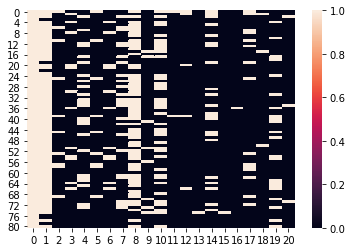

In [ ]:
sns.heatmap(list_whether_exist)

<AxesSubplot:>

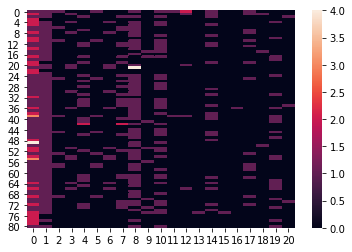

In [ ]:
sns.heatmap(list_num_exist)

In [ ]:
arr_whether_exist = np.array(list_whether_exist)

In [ ]:
arr_whether_exist[:,0] # 主文

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
arr_whether_exist[:,1] # 事實及理由

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True])

In [ ]:
for i in df.title:
 print(i)

臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 73 號民事判決
臺灣橋頭地方法院 110 年度 簡 字第 48 號民事裁定
臺灣橋頭地方法院 110 年度 簡 字第 14 號民事判決
臺灣橋頭地方法院 110 年度 簡 字第 16 號民事判決
臺灣桃園地方法院 110 年度 簡 字第 15 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 189 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 148 號民事判決
臺灣橋頭地方法院 110 年度 簡 字第 103 號民事判決
臺灣橋頭地方法院 110 年度 簡 字第 58 號民事判決
臺灣屏東地方法院 110 年度 簡 字第 10 號民事判決
臺灣雲林地方法院 110 年度 簡 字第 7 號民事判決
臺灣雲林地方法院 110 年度 簡 字第 5 號民事判決
臺灣彰化地方法院 110 年度 簡 字第 68 號民事判決
臺灣彰化地方法院 110 年度 簡 字第 26 號民事判決
臺灣臺北地方法院 110 年度 簡 字第 26 號民事判決
臺灣新竹地方法院 110 年度 竹簡 字第 47 號民事判決
臺灣南投地方法院 110 年度 簡 字第 19 號民事判決
臺灣苗栗地方法院 110 年度 苗簡 字第 125 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 125 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 110 號民事判決
臺灣高等法院 臺中分院 110 年度 抗 字第 106 號民事裁定
臺灣臺中地方法院 110 年度 簡上 字第 33 號民事判決
臺灣新北地方法院 110 年度 簡 字第 68 號民事判決
臺灣橋頭地方法院 110 年度 簡 字第 52 號民事判決
臺灣桃園地方法院 110 年度 簡 字第 18 號民事判決
臺灣新北地方法院 110 年度 簡 字第 49 號民事判決
臺灣雲林地方法院 110 年度 簡 字第 3 號民事判決
臺灣士林地方法院 110 年度 簡 字第 10 號民事判決
臺灣臺中地方法院 110 年度 簡 字第 113 號民事判決
臺灣雲林地方法院 110 年度 簡 字第 27 號民事判決
臺灣新北地方法院 110 年度 小上 字第 3 號民事判

## Segmentization

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import seaborn as sns

In [ ]:
def text_parse(text): # 把内文從HTML中挑出來
    
    # 先從一堆Html element裏面挑出主文
    soup_panel = BeautifulSoup(text, 'lxml')
    main_text = str(soup_panel.find_all(name = "div", attrs = {"class":"col-td jud_content"}))
    
    # 把主文變成str
    content = BeautifulSoup(main_text, 'lxml')
    str_content = (content.get_text())
    #做點美化
    str_content = str_content.replace('\u3000','').replace(' ','').replace('\xa0','').replace('\uec1d','')
    
    return str_content

In [ ]:
def cue_carpet(str_content): # 先看内文裏面的綫索
    
    section = ['主文',
               '事實及理由',
               '、程序事項：','、程序部分：','、程序方面：',
               '、實體事項：','、實體部分：','、實體方面：',
               '、原告主張：','、原告起訴主張：',
               '、被告則以：',
               '、兩造爭執與不爭執',
               '、兩造爭執','、本件爭執',
               '、兩造不爭執','、本件不爭執',
               '、爭點',
               '、得心證之理由：','、法院之判斷：','、本院之判斷：','、本院的判斷：',
               '書記官']
    list_cue = []
    whether_exist = []
    num_exist = []

    for i in section:
        cue = re.findall(i, str_content)
        list_cue.append(cue)
    
    for j in list_cue:
        if len(j) == 0:
            exist = False
            no_exist = 0
        else:
            exist = True
            no_exist = len(j)
        whether_exist.append(exist)
        num_exist.append(no_exist)
    
    return whether_exist, num_exist, section

In [ ]:
df = df = pd.read_csv('verdict_110.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head(n=1)

字號  ...    判別
0  臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決  ...  民事判決

[1 rows x 7 columns]

In [ ]:
list_jud = []
list_leftover = []
for i in df.main_text_raw:
    
    str_content = text_parse(i)
    whether_exist, num_exist, section = cue_carpet(str_content)
    
    if whether_exist[0]: # 抓出主文，事實及理由中間的文字
        target = str_content.split(section[0], maxsplit = 1)[1]
        
        if whether_exist[1]:
            jud = target.split(section[1], maxsplit = 1)[0]
            leftover = target.split(section[1], maxsplit = 1)[1]
        else:
            jud = np.nan
            leftover = target
    else:
        jud = np.nan
        leftover = str_content
        
    list_jud.append(jud) ############ 主文，事實及理由中間的最終判決
    list_leftover.append(leftover) ################ 撇除 主文，事實及理由中間的最終判決 后留下的片段，要進行第二部的過濾

In [ ]:
k = 0
for i in list_jud:
  if type(i) == float: ########## np.nan 的type 是float
    k += 1

print(k) #爲了看有多少的jud沒有抓出來

6


In [ ]:
list_jud = pd.DataFrame(list_jud)
df = pd.concat([df, list_jud],axis = 1)
df.columns = ['字號', 'main_text_raw', '裁判日期', '裁判案由', 'district', '字別', '判別', '判決']
df.head(n=1)

字號  ...                                                 判決
0  臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決  ...  \n被告應給付原告新臺幣貳拾貳萬伍仟捌佰柒拾參元，及自民國一\n○九年三月二十七日起至清償日...

[1 rows x 8 columns]

In [ ]:
list_b4_clerk = [] # 以書記官為cue，split内文
list_aft_clerk = []
for i in list_leftover:
  target = i.split('書記官')
  if len(target) == 2:
    list_b4_clerk.append(target[0])
    list_aft_clerk.append(target[1])
  else:
    list_b4_clerk.append(i)
    list_aft_clerk.append(np.nan)

In [ ]:
list_aft_clerk = pd.DataFrame(list_aft_clerk)
list_b4_clerk = pd.DataFrame(list_b4_clerk)
df = pd.concat([df, list_aft_clerk, list_b4_clerk],axis = 1)
df.columns = ['字號', 'main_text_raw', '裁判日期', '裁判案由', 'district', '字別', '判別', '判決', 'aft_clerk', 'b4_clerk']
df.head(n=2)

字號  ...                                           b4_clerk
0  臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決  ...  \n甲、程序事項：\n壹、按修正之民事訴訟法簡易訴訟程序，依本施行法第12條第10\n項公告...
1   臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決  ...  \n壹、程序部分：\n按訴狀送達後，原告不得將原訴變更或追加他訴，但擴張或\n減縮應受判決事...

[2 rows x 10 columns]

In [ ]:
def path_decider(text_to_be_decided_path):
  # 判決書如果有pattern_both就進入segmentation path 2，不然就path 1
  pattern_123 = '(甲|乙|丙|丁|戊|己|庚|辛|壬|癸|一|二|三|四|五|六|七|八|九|十|壹|貳|參|肆|伍|陸|柒|捌|玖|拾)(、)'
  pattern_both = ['(兩造|本件).*爭執(與|及)不爭執','(兩造|本件).*不爭執(與|及)爭執','(兩造|本件)(的|之)?不爭執(的|之)?(事項|事實)(與|及)本(案|件)(的|之)?爭點']
  path_cue = []
  for i in pattern_both:
    r = re.compile(pattern_123 + i)
    for j in r.finditer(text_to_be_decided_path):
      path_cue.append(j.group())

  if len(path_cue) == 0: # 表示沒detect到pattern_both, 進入path 1
    return 0
  else:# 表示detect到pattern_both, 進入path 2
    return 1

In [ ]:
def mahjong_insert(text_to_be_inserted, pattern, tag):
  insert = "LOOK_AT_ME"
  r = re.compile(pattern)
  cue = [m.group() for m in r.finditer(text_to_be_inserted)]##有可能會找不到cue，可能會出bug

  for i in cue:
    k = text_to_be_inserted.find(i)
    text_to_be_inserted = text_to_be_inserted[:k] + insert + tag + text_to_be_inserted[k:]

  return text_to_be_inserted

In [ ]:
def label(list_sec):
  list_tag = ["PROCEDURE:", "ACTUAL:", "PLAINTIFF:", "DEFENDANT:", "BOTH:", "NOT_ARG:", "ARG:", "JUD:"]
  dict_section = {}

  for i in list_tag:
    for j in list_sec:
      if j:

        if re.match(i,j) != None: #如果list_sec裏面的element的開頭有match到list_tag

          dict_section[i] = j


  return dict_section  

In [ ]:
def path_1_split_and_label(text_to_be_split):
  dict_section = {}
  pattern_123 = '(甲|乙|丙|丁|戊|己|庚|辛|壬|癸|一|二|三|四|五|六|七|八|九|十|壹|貳|參|肆|伍|陸|柒|捌|玖|拾)(、)'

  pattern_proc = '(程序)(事項|部分|方面)'
  pattern_actual = '(實體)(事項|部分|方面)'

  pattern_plaintiff = '(原告).*(主張|方面).*(：|,)'
  pattern_defendant = '(被告).*(方面|辯|以)(：|,)'

  pattern_not_arg = ['(兩造|本件)(的|之)?不爭執(的|之)?(事項|事實)','不爭執(的|之)?(事項|事實)']
  pattern_arg = ['(兩造|本件)(的|之)?爭執(的|之)?事項','爭執(的|之)?事項','本(案|件)(的|之)?爭點']

  pattern_jud = ['(法院|本院)(的|之)?判斷','(法院|本院)?(的|之)?得心證之理由']
  
  pattern = pattern_123 + pattern_proc
  tag = "PROCEDURE:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  pattern = pattern_123 + pattern_actual
  tag = "ACTUAL:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  pattern = pattern_123 + pattern_plaintiff
  tag = "PLAINTIFF:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  pattern = pattern_123 + pattern_defendant
  tag = "DEFENDANT:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  for i in pattern_not_arg:
    pattern = pattern_123 + i
    tag = "NOT_ARG:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  for i in pattern_arg:
    pattern = pattern_123 + i
    tag = "ARG:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  for i in pattern_jud:
    pattern = pattern_123 + i
    tag = "JUD:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  str_inserted = re.sub(r'\s', "", text_to_be_split)
  list_sec = str_inserted.split('LOOK_AT_ME')

  if len(list_sec) == 1:
    dict_section['OTHER:'] = list_sec[0]
  else:
    dict_section = label(list_sec)

  return dict_section

In [ ]:
def path_2_split_and_label(text_to_be_split):
  pattern_123 = '(甲|乙|丙|丁|戊|己|庚|辛|壬|癸|一|二|三|四|五|六|七|八|九|十|壹|貳|參|肆|伍|陸|柒|捌|玖|拾)(、)'

  pattern_proc = '(程序)(事項|部分|方面)'
  pattern_actual = '(實體)(事項|部分|方面)'

  pattern_plaintiff = '(原告).*(主張|方面).*(：|,)'
  pattern_defendant = '(被告).*(方面|辯|以)(：|,)'

  pattern_both = ['(兩造|本件).*爭執(與|及)不爭執','(兩造|本件).*不爭執(與|及)爭執','(兩造|本件)(的|之)?不爭執(的|之)?(事項|事實)(與|及)本(案|件)(的|之)?爭點']

  pattern_not_arg = ['(兩造|本件)(的|之)?不爭執(的|之)?(事項|事實)','不爭執(的|之)?(事項|事實)']
  pattern_arg = ['(兩造|本件)(的|之)?爭執(的|之)?事項','爭執(的|之)?事項','本(案|件)(的|之)?爭點']

  pattern_jud = ['(法院|本院)(的|之)?判斷','(法院|本院)?(的|之)?得心證之理由']
  
  pattern = pattern_123 + pattern_proc
  tag = "PROCEDURE:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  pattern = pattern_123 + pattern_actual
  tag = "ACTUAL:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  pattern = pattern_123 + pattern_plaintiff
  tag = "PLAINTIFF:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  pattern = pattern_123 + pattern_defendant
  tag = "DEFENDANT:"
  text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  for i in pattern_both:
    pattern = pattern_123 + i
    tag = "BOTH:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  for i in pattern_jud:
    pattern = pattern_123 + i
    tag = "JUD:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  str_inserted = re.sub(r'\s', "", text_to_be_split)
  list_sec = str_inserted.split('LOOK_AT_ME')
  dict_section = label(list_sec)

  #subsec - 把both_section再細分arg 和 not arg
  text_to_be_split = dict_section["BOTH:"]
  for i in pattern_not_arg:
    pattern = pattern_123 + i
    tag = "NOT_ARG:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  for i in pattern_arg:
    pattern = pattern_123 + i
    tag = "ARG:"
    text_to_be_split = mahjong_insert(text_to_be_split, pattern, tag)

  str_inserted = re.sub(r'\s', "", text_to_be_split)
  list_sec = str_inserted.split('LOOK_AT_ME')
  dict_section_2 = label(list_sec)

  dict_section.update(dict_section_2)

  return dict_section

In [ ]:
def mahjong_insert_and_split_2_pathway(text):
  path_cue = path_decider(text)
  if path_cue == 0:
    dict_section = path_1_split_and_label(text)
  else:
    dict_section = path_2_split_and_label(text)
  return dict_section

In [ ]:
list_dict_sec = []
for i in df.b4_clerk:
  list_dict_sec.append(mahjong_insert_and_split_2_pathway(i))

print(len(list_dict_sec))

81


In [ ]:
list_dict_sec

[{'ACTUAL:': 'ACTUAL:乙、實體事項：',
  'ARG:': 'ARG:二、兩造爭執事項：㈠原告得請求之不能工作之損失、機車修復費用、停放機車保管費用、代步租車費用各為若干？㈡原告請求精神慰撫金30萬元，是否過高？如肯定，適當之金額為何？',
  'BOTH:': 'BOTH:參、兩造爭執與不爭執事項（見本院簡卷第21至22頁；本院依判決格式修正或增刪文句，或依爭點論述順序整理內容）：',
  'DEFENDANT:': 'DEFENDANT:貳、被告則以：被告就本件事故應負完全過失責任，及原告因本件事故支出醫療費用15,390元、就醫交通費1萬元、拖吊費用1,600元及安全帽、藍芽耳機及眼鏡經折舊後之損失1萬元，且屬必要費用部分，均不爭執，惟就下列費用意見如下：一、不能工作之損失：依侑成公司回函，原告於事故後3個月內休假天數共為41日，扣除一般月休天數每月約6至8日後，原告實際請假日數應為17日至22日，又依原告之中國醫藥大學附設醫院（下稱中國醫院）診斷書記載原告離院後宜休養，休養日數應為2至3週較為適宜，且與侑成公司提供之原告差勤打卡資料相符。至於原告提出之訴外人杏林堂診所診斷書，雖紀載原告宜休養3個月左右，然原告係於本件事故發生近約4個月後之108年6月15日方至該診所就診，足見該診斷書上開紀載有欠客觀，不宜採信。二、財物損失部分：㈠原告就就系爭機車受損需修復費用151,590元部分，固不爭執，然被告否認本件事故發生當日，系爭機車甫維修完成，故系爭機車之零件部分仍應扣除折舊。㈡保險公司於本件事故發生起3日內即受理此交通事故案件，並於108年2月27日派員確認系爭機車受損部位及維修金額，原告自己不願維修，將系爭機車放在車行之保管費與另行租車之費用，自不得請求被告賠償。三、精神慰撫金：被告現為一般業務助理人員，本件車禍發生後立即電話關心聯絡原告，並於108年6月6日、8月20日、12月12日、109年4月15日親自到場參與調解，被告有誠意和解，惟因經濟狀況並非寬裕，請求酌減原告請求之精神慰撫金等語，資為抗辯。並聲明：原告之訴駁回；如受不利益判決，願供擔保，請准宣告免為假執行。',
  'JUD:': 'JUD:肆、得心證之理由：一、原告主張被告於上揭時、地，於右轉彎前疏未顯示方向燈及禮讓直行車先行，造成原告閃避不及，人車倒地而受有上揭傷害之事實

In [ ]:
list_dict_sec[0]['ACTUAL:']

'ACTUAL:乙、實體事項：'

In [ ]:
df

字號  ...                                                 判決
0   臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決  ...  \n被告應給付原告新臺幣貳拾貳萬伍仟捌佰柒拾參元，及自民國一\n○九年三月二十七日起至清償日...
1    臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決  ...  \n被告應給付原告新台幣貳拾玖萬叁仟叁佰貳拾肆元，及自民國一\n０九年五月九日起至清償日止按...
2    臺灣臺中地方法院 110 年度 簡 字第 73 號民事判決  ...  \n被告應給付新臺幣伍拾柒萬捌仟柒佰陸拾參元，及自民國一百零\n八年六月七日起至清償日止，按...
3    臺灣橋頭地方法院 110 年度 簡 字第 48 號民事裁定  ...                                                NaN
4    臺灣橋頭地方法院 110 年度 簡 字第 14 號民事判決  ...  \n被告應給付原告新臺幣壹拾玖萬肆仟陸佰壹拾柒元，及自民國一\n百零九年十一月十一日起至清償...
..                             ...  ...                                                ...
76  臺灣嘉義地方法院 110 年度 全事聲 字第 2 號民事裁定  ...                                                NaN
77   臺灣嘉義地方法院 110 年度 聲 字第 29 號民事裁定  ...                                                NaN
78    臺灣橋頭地方法院 110 年度 簡 字第 2 號民事判決  ...  \n被告應給付原告新臺幣貳拾肆萬陸仟陸佰捌拾捌元，及自民國一\n百零九年三月十二日起至清償日...
79     最高法院 110 年度 台上 字第 325 號民事判決  ...                                                NaN
80   臺灣新竹地方法院 110 年度 竹簡 字第 8 號民事判決  ...                          原告之訴及假執行之聲請均駁回。訴訟費用由原告負擔。

[81 rows x 8 columns]

In [ ]:
columns = ["PROCEDURE:", "ACTUAL:", "PLAINTIFF:", "DEFENDANT:", "NOT_ARG:", "ARG:", "JUD:", "OTHER:"]

In [ ]:
for i in columns:
  df[i] = np.nan

In [ ]:
for i in df.index:
  print(i)
  for j in list_dict_sec[i]:
    print(j)
    df.loc[i,j] = list_dict_sec[i][j]

0
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
BOTH:
JUD:
NOT_ARG:
ARG:
1
PROCEDURE:
PLAINTIFF:
DEFENDANT:
NOT_ARG:
ARG:
JUD:
2
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
NOT_ARG:
JUD:
3
OTHER:
4
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
ARG:
JUD:
5
PLAINTIFF:
DEFENDANT:
NOT_ARG:
ARG:
JUD:
6
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
7
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
8
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
9
PLAINTIFF:
DEFENDANT:
NOT_ARG:
ARG:
JUD:
10
JUD:
11
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
12
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
NOT_ARG:
ARG:
13
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
NOT_ARG:
JUD:
14
PROCEDURE:
PLAINTIFF:
DEFENDANT:
15
PLAINTIFF:
DEFENDANT:
JUD:
16
PLAINTIFF:
DEFENDANT:
JUD:
17
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
18
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
19
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
BOTH:
JUD:
20
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
BOTH:
JUD:
21
PROCEDURE:
ACTUAL:
PLAINTIFF:
DEFENDANT:
JUD:
22


In [ ]:
df

字號  ...                                              BOTH:
0   臺灣臺中地方法院 110 年度 簡 字第 119 號民事判決  ...  BOTH:參、兩造爭執與不爭執事項（見本院簡卷第21至22頁；本院依判決格式修正或增刪文句，...
1    臺灣臺中地方法院 110 年度 簡 字第 23 號民事判決  ...                                                NaN
2    臺灣臺中地方法院 110 年度 簡 字第 73 號民事判決  ...                                                NaN
3    臺灣橋頭地方法院 110 年度 簡 字第 48 號民事裁定  ...                                                NaN
4    臺灣橋頭地方法院 110 年度 簡 字第 14 號民事判決  ...                                                NaN
..                             ...  ...                                                ...
76  臺灣嘉義地方法院 110 年度 全事聲 字第 2 號民事裁定  ...                                                NaN
77   臺灣嘉義地方法院 110 年度 聲 字第 29 號民事裁定  ...                                                NaN
78    臺灣橋頭地方法院 110 年度 簡 字第 2 號民事判決  ...                                                NaN
79     最高法院 110 年度 台上 字第 325 號民事判決  ...                                                NaN
80   臺灣新竹地方法院 110 年度 竹簡 字第 8 號民事判決  ...                                                NaN

[81 rows x 19 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_

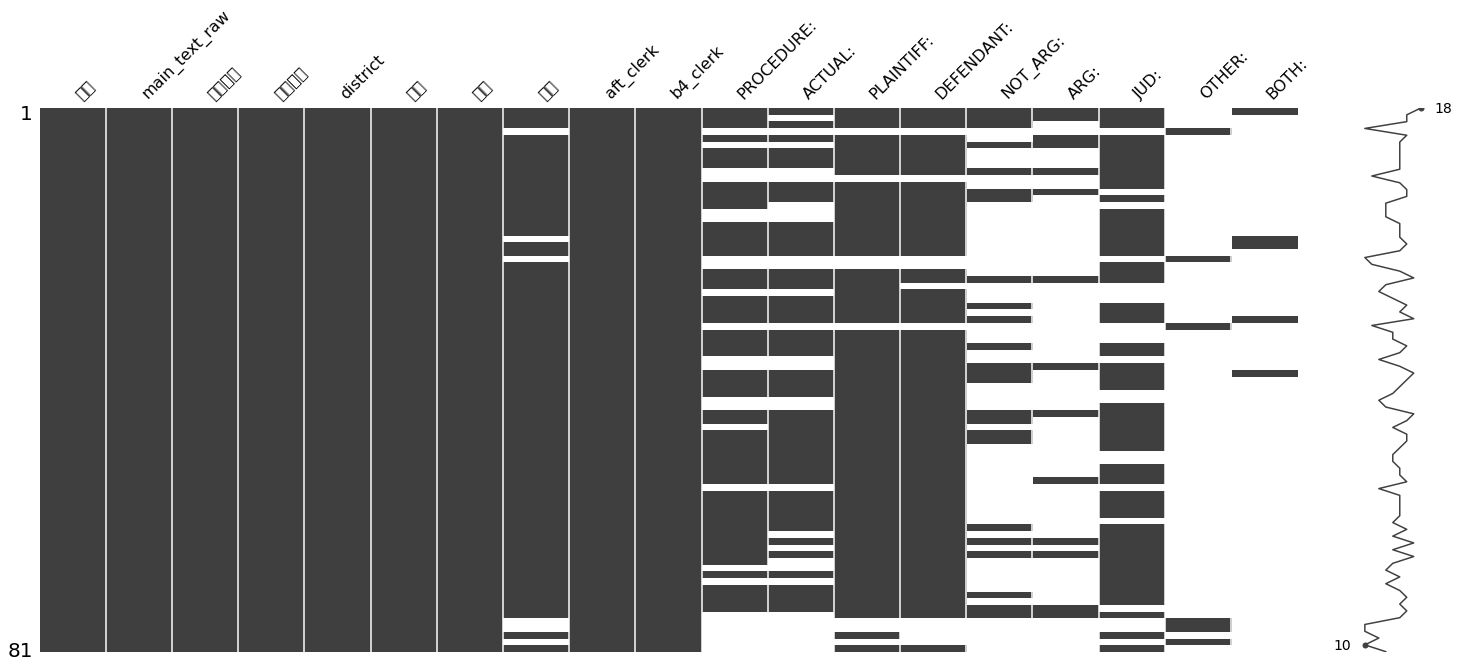

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.to_csv('verdict_110_aft_seg.csv')

## 檢視segment内容，歸納出結構或規律

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import random
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('verdict_110_aft_seg.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)

In [3]:
df_rand = df[['判決', 'PROCEDURE:', 'ACTUAL:', 'PLAINTIFF:',
       'DEFENDANT:', 'NOT_ARG:', 'ARG:', 'JUD:', 'OTHER:', 'BOTH:']]

### 判決

In [14]:
list_with_element = []
for i in df_rand['判決']:
  if type(i) != float:
    list_with_element.append(i.strip())
list_with_element

['被告應給付原告新臺幣貳拾貳萬伍仟捌佰柒拾參元，及自民國一\n○九年三月二十七日起至清償日止，按週年利率百分之五計算之\n利息。\n原告其餘之訴駁回。\n訴訟費用由被告負擔三分之一，餘由原告負擔。\n本判決原告勝訴部分得假執行；但被告如以新臺幣貳拾貳萬伍仟\n捌佰柒拾參元為原告預供擔保，得免為假執行。\n原告其餘假執行之聲請駁回。',
 '被告應給付原告新台幣貳拾玖萬叁仟叁佰貳拾肆元，及自民國一\n０九年五月九日起至清償日止按年息百分之五計算之利息。\n原告其餘之訴駁回。\n訴訟費用新台幣捌仟叁佰叁拾伍元，由被告負擔新台幣貳仟壹佰\n肆拾叁元，餘由原告負擔。\n本判決第一項得假執行。但被告如於假執行程序實施前以新台幣\n貳拾玖萬叁仟叁佰貳拾肆元為原告預供擔保後，得免為假執行。\n原告其餘假執行之聲請駁回。',
 '被告應給付新臺幣伍拾柒萬捌仟柒佰陸拾參元，及自民國一百零\n八年六月七日起至清償日止，按年息百分之五計算之利息。\n原告其餘之訴駁回。\n訴訟費用（除減縮部分外）由被告負擔四分之一，餘由原告負擔\n。\n本判決第一項於原告以新臺幣壹拾玖萬參仟元供擔保後，得假執\n行。但被告如以新臺幣伍拾柒萬捌仟柒佰陸拾參元為原告預供擔\n保，得免為假執行。\n原告其餘假執行之聲請駁回。',
 '被告應給付原告新臺幣壹拾玖萬肆仟陸佰壹拾柒元，及自民國一\n百零九年十一月十一日起至清償日止，按年息百分之五計算之利\n息。\n原告其餘之訴駁回。\n訴訟費用由被告負擔百分之四十五，餘由原告負擔。\n本判決原告勝訴部分，得假執行。但被告以新臺幣壹拾玖萬肆仟\n陸佰壹拾柒元為原告預供擔保，得免為假執行。\n原告其餘假執行之聲請駁回。',
 '原告之訴及假執行之聲請均駁回。\n訴訟費用由原告負擔。',
 '一、被告蔡大正、陳俊德應連帶給付原告盧守軒即綺軒燈具傢飾\n行新臺幣貳拾柒萬玖仟伍佰肆拾壹元，及被告蔡大正自民國\n一百零九年九月二十三日起、被告陳俊德自民國一百零九年\n十二月二十四日起，均至清償日止，按週年利率百分之五計\n算之利息。\n二、被告陳俊德、精銘塑膠股份有限公司應連帶給付原告盧守軒\n即綺軒燈具傢飾行新臺幣貳拾柒萬玖仟伍佰肆拾壹元，及自\n民國一百零九年十二月二十四日起至清償日止，按週年利率\n百分之五計算之利息。\n三、本判決第一、二項所命之給付，如有任一被告為給

In [54]:
# 罰款
amount = []
oth_amount = []

for i in df_rand.判決:

  if type(i)!= float:
    i = re.sub(r'\s', '',i)
    to_split = [m.start() for m in re.finditer("原告.{0,23}其餘之訴(均|都)?駁回", i)]
    
    if to_split:
      amount.append(i[:to_split[0]])
      oth_amount.append(i[to_split[0]:])
    else:
      to_split_2 = [m.start() for m in re.finditer("原告(其餘)?之訴及(其)?假執行之聲請(均|都)?駁回", i)]
      if to_split_2:
        amount.append(i[:to_split_2[0]])
        oth_amount.append(i[to_split_2[0]:])
      else:
        amount.append(np.nan)
        oth_amount.append(i) 

  else:
    amount.append(np.nan)
    oth_amount.append(np.nan)

amount

['被告應給付原告新臺幣貳拾貳萬伍仟捌佰柒拾參元，及自民國一○九年三月二十七日起至清償日止，按週年利率百分之五計算之利息。',
 '被告應給付原告新台幣貳拾玖萬叁仟叁佰貳拾肆元，及自民國一０九年五月九日起至清償日止按年息百分之五計算之利息。',
 '被告應給付新臺幣伍拾柒萬捌仟柒佰陸拾參元，及自民國一百零八年六月七日起至清償日止，按年息百分之五計算之利息。',
 nan,
 '被告應給付原告新臺幣壹拾玖萬肆仟陸佰壹拾柒元，及自民國一百零九年十一月十一日起至清償日止，按年息百分之五計算之利息。',
 '',
 '一、被告蔡大正、陳俊德應連帶給付原告盧守軒即綺軒燈具傢飾行新臺幣貳拾柒萬玖仟伍佰肆拾壹元，及被告蔡大正自民國一百零九年九月二十三日起、被告陳俊德自民國一百零九年十二月二十四日起，均至清償日止，按週年利率百分之五計算之利息。二、被告陳俊德、精銘塑膠股份有限公司應連帶給付原告盧守軒即綺軒燈具傢飾行新臺幣貳拾柒萬玖仟伍佰肆拾壹元，及自民國一百零九年十二月二十四日起至清償日止，按週年利率百分之五計算之利息。三、本判決第一、二項所命之給付，如有任一被告為給付時，其餘被告於該給付範圍內，免為給付之義務。四、被告蔡大正、陳俊德應連帶給付原告林煜珽新臺幣柒仟伍佰柒拾壹元，及被告蔡大正自民國一百零九年九月二十三日起、被告陳俊德自民國一百零九年十二月二十四日起，均至清償日止，按週年利率百分之五計算之利息。五、被告陳俊德、精銘塑膠股份有限公司應連帶給付原告林煜珽新臺幣柒仟伍佰柒拾壹元，及自民國一百零九年十二月二十四日起至清償日止，按週年利率百分之五計算之利息。六、本判決第四、五項所命之給付，如有任一被告為給付時，其餘被告於該給付範圍內，免為給付之義務。七、被告蔡大正、陳俊德應連帶給付原告莊家成新臺幣壹萬柒仟捌佰參拾貳元，及被告蔡大正自民國一百零九年九月二十三日起、被告陳俊德自民國一百零九年十二月二十四日起，均至清償日止，按週年利率百分之五計算之利息。八、被告陳俊德、精銘塑膠股份有限公司應連帶給付原告莊家成新臺幣壹萬柒仟捌佰參拾貳元，及自民國一百零九年十二月二十四日起至清償日止，按週年利率百分之五計算之利息。九、本判決第七、八項所命之給付，如有任一被告為給付時，其餘被告於該給付範圍內，免為給付之義務。十、',
 '被告應連帶給付原告新臺幣參拾玖萬捌仟壹佰伍拾玖元，及被告洪御勝自民國一

In [49]:
oth_amount

['原告其餘之訴駁回。訴訟費用由被告負擔三分之一，餘由原告負擔。本判決原告勝訴部分得假執行；但被告如以新臺幣貳拾貳萬伍仟捌佰柒拾參元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '原告其餘之訴駁回。訴訟費用新台幣捌仟叁佰叁拾伍元，由被告負擔新台幣貳仟壹佰肆拾叁元，餘由原告負擔。本判決第一項得假執行。但被告如於假執行程序實施前以新台幣貳拾玖萬叁仟叁佰貳拾肆元為原告預供擔保後，得免為假執行。原告其餘假執行之聲請駁回。',
 '原告其餘之訴駁回。訴訟費用（除減縮部分外）由被告負擔四分之一，餘由原告負擔。本判決第一項於原告以新臺幣壹拾玖萬參仟元供擔保後，得假執行。但被告如以新臺幣伍拾柒萬捌仟柒佰陸拾參元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 nan,
 '原告其餘之訴駁回。訴訟費用由被告負擔百分之四十五，餘由原告負擔。本判決原告勝訴部分，得假執行。但被告以新臺幣壹拾玖萬肆仟陸佰壹拾柒元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '原告之訴及假執行之聲請均駁回。訴訟費用由原告負擔。',
 '原告其餘之訴駁回。十一、訴訟費用由原告盧守軒即綺軒燈具傢飾行負擔百分之四十、原告林煜珽負擔百分之一、原告莊家成負擔百分之二，餘由被告連帶負擔。十二、本判決第一、二項得假執行。但被告如以新臺幣貳拾柒萬玖仟伍佰肆拾壹元為原告盧守軒即綺軒燈具傢飾行預供擔保後，得免為假執行。十三、本判決第四、五項得假執行。但被告如以新臺幣柒仟伍佰柒拾壹元為原告林煜珽預供擔保後，得免為假執行。十四、本判決第七、八項得假執行。但被告如以新臺幣壹萬柒仟捌佰參拾貳元為原告莊家成預供擔保後，得免為假執行。十五、原告其餘假執行之聲請均駁回。',
 '原告其餘之訴駁回。本判決第一項得假執行。原告其餘假執行之聲請駁回。',
 '原告其餘之訴駁回。訴訟費用由被告連帶負擔百分之十四，餘由原告負擔。本判決原告勝訴部分得假執行。但被告如分別以新臺幣參佰捌拾萬柒仟壹佰柒拾柒元、玖萬元為原告柯進發、魏麗桂供擔保後，得免為假執行。',
 '原告其餘之訴駁回。訴訟費用由被告負擔百分之五十三，餘由原告負擔。本判決第一項得假執行。但被告以新臺幣壹佰零參萬柒仟貳佰貳拾元為原告預供擔保，得免為假執行。',
 '原告其餘之訴駁回。訴訟費用由被告負擔。本判決第一項得假執行，但被告如以新臺幣壹拾萬

In [52]:
# 駁回or not
container = []
reject = []
for i in oth_amount:
  if type(i) != float:
    container.append(i.split("。", maxsplit = 1)[0])
  else:
    container.append(np.nan)  

for i in container:
  if type(i) != float:
    to_split = [m.start() for m in re.finditer("原告.{0,23}其餘之訴(均|都)?駁回", i)]
    if to_split:
      reject.append(np.nan)
    else:
      reject.append(i)
  else:
    reject.append(np.nan)

In [53]:
reject

[nan,
 nan,
 nan,
 nan,
 nan,
 '原告之訴及假執行之聲請均駁回',
 nan,
 nan,
 nan,
 nan,
 nan,
 '原告之訴駁回',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '兩造上訴均駁回',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '上訴駁回',
 '原告之訴及假執行之聲請均駁回',
 '原告新臺幣參拾萬參仟肆佰貳拾捌元',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '原告其餘之訴及假執行之聲請均駁回',
 nan,
 nan,
 nan,
 nan,
 nan,
 '原告其餘之訴及假執行之聲請均駁回',
 nan,
 nan,
 '原告之訴及假執行之聲請均駁回',
 nan,
 nan,
 '原告之訴駁回',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '原告之訴及假執行之聲請均駁回',
 nan,
 nan,
 nan,
 '原告之訴及其假執行之聲請均駁回',
 '原告之訴及假執行之聲請均駁回',
 nan,
 nan,
 nan,
 nan,
 '被告應連帶給付原告許銘發新臺幣貳拾壹萬玖仟貳佰壹拾柒元，及自民國一百零九年三月十七日起至清償日止，按週年利率百分之五計算之利息',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '原告之訴及假執行之聲請均駁回']

In [40]:
# 訴訟費用
fee = []
oth_fee = []

for i in oth_amount:

  if type(i) != float:
    to_split = [m.start() for m in re.finditer("訴訟費用", i)]

    if to_split:
      fee.append(i[to_split[0]:].split("。", maxsplit = 1)[0])
      oth_fee.append(i[to_split[0]:].split("。", maxsplit = 1)[1])
    else:
      fee.append(np.nan)
      oth_fee.append(i)

  else:
    fee.append(np.nan)
    oth_fee.append(i)

fee 

['訴訟費用由被告負擔三分之一，餘由原告負擔',
 '訴訟費用新台幣捌仟叁佰叁拾伍元，由被告負擔新台幣貳仟壹佰肆拾叁元，餘由原告負擔',
 '訴訟費用（除減縮部分外）由被告負擔四分之一，餘由原告負擔',
 nan,
 '訴訟費用由被告負擔百分之四十五，餘由原告負擔',
 '訴訟費用由原告負擔',
 '訴訟費用由原告盧守軒即綺軒燈具傢飾行負擔百分之四十、原告林煜珽負擔百分之一、原告莊家成負擔百分之二，餘由被告連帶負擔',
 nan,
 '訴訟費用由被告連帶負擔百分之十四，餘由原告負擔',
 '訴訟費用由被告負擔百分之五十三，餘由原告負擔',
 '訴訟費用由被告負擔',
 nan,
 '訴訟費用由被告負擔二分之一，餘由原告負擔',
 '訴訟費用由被告負擔百分之十五，餘由原告負擔',
 '訴訟費用由被告負擔23％，餘由原告連帶負擔',
 '訴訟費用（減縮部分除外）由被告負擔百分之76，餘由原告負擔',
 '訴訟費用由被告董秋忠負擔百分之四十七，餘由原告負擔',
 '訴訟費用百分七十二之由被告負擔，餘由原告負擔',
 '訴訟費用由被告負擔六分之一，餘由原告負擔',
 nan,
 '訴訟費用由被告負擔百分之12，餘由原告負擔',
 '訴訟費用由被告連帶負擔百分之十一，餘由原告負擔',
 nan,
 '訴訟費用由兩造各自負擔',
 '訴訟費用由被告負擔十分之二，餘由原告負擔',
 '訴訟費用由被告負擔百分之四，餘由原告負擔',
 '訴訟費用（減縮後）由被告負擔百分之四十四，餘由原告負擔',
 '訴訟費用由被告負擔百分之三十九，餘由原告負擔',
 '訴訟費用（減縮部分除外）由被告負擔百分之二十八，餘由原告負擔',
 '訴訟費用由被告連帶負擔十分之二，餘由原告負擔',
 nan,
 '訴訟費用由被告連帶負擔二分之一，餘由原告負擔',
 '訴訟費用新臺幣1,500元由上訴人負擔',
 '訴訟費用由原告負擔',
 '訴訟費用（除減縮部分外）由被告負擔百分之四十五，餘由原告負擔',
 '訴訟費用由原告負擔',
 '訴訟費用由被告負擔十分之三，餘由原告負擔',
 '訴訟費用由被告負擔百分之55，餘由原告負擔',
 '訴訟費用由原告黃國翔負擔百分之六十，原告戴逸華負擔百分之十，餘由被告負擔',
 '訴訟費用由被告負擔百分之四十四，餘由原告負擔',
 '訴訟費用由被告負擔百分之二十二，餘由原告

In [41]:
oth_fee

['本判決原告勝訴部分得假執行；但被告如以新臺幣貳拾貳萬伍仟捌佰柒拾參元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '本判決第一項得假執行。但被告如於假執行程序實施前以新台幣貳拾玖萬叁仟叁佰貳拾肆元為原告預供擔保後，得免為假執行。原告其餘假執行之聲請駁回。',
 '本判決第一項於原告以新臺幣壹拾玖萬參仟元供擔保後，得假執行。但被告如以新臺幣伍拾柒萬捌仟柒佰陸拾參元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 nan,
 '本判決原告勝訴部分，得假執行。但被告以新臺幣壹拾玖萬肆仟陸佰壹拾柒元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '',
 '十二、本判決第一、二項得假執行。但被告如以新臺幣貳拾柒萬玖仟伍佰肆拾壹元為原告盧守軒即綺軒燈具傢飾行預供擔保後，得免為假執行。十三、本判決第四、五項得假執行。但被告如以新臺幣柒仟伍佰柒拾壹元為原告林煜珽預供擔保後，得免為假執行。十四、本判決第七、八項得假執行。但被告如以新臺幣壹萬柒仟捌佰參拾貳元為原告莊家成預供擔保後，得免為假執行。十五、原告其餘假執行之聲請均駁回。',
 '原告其餘之訴駁回。本判決第一項得假執行。原告其餘假執行之聲請駁回。',
 '本判決原告勝訴部分得假執行。但被告如分別以新臺幣參佰捌拾萬柒仟壹佰柒拾柒元、玖萬元為原告柯進發、魏麗桂供擔保後，得免為假執行。',
 '本判決第一項得假執行。但被告以新臺幣壹佰零參萬柒仟貳佰貳拾元為原告預供擔保，得免為假執行。',
 '本判決第一項得假執行，但被告如以新臺幣壹拾萬伍仟肆佰玖拾參元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '原告之訴駁回。',
 '本判決第一項得假執行。原告其餘假執行之聲請駁回。',
 '本判決第一項於原告以新臺幣貳拾壹萬元供擔保後，得假執行。但被告如以新臺幣陸拾壹萬捌仟伍佰伍拾參元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '本判決第1項得假執行。但被告如以新台幣82萬3,472元預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '本判決原告勝訴部分得假執行。原告其餘假執行之聲請駁回。',
 '本判決原告勝訴部分得假執行，但被告董秋忠如以新臺幣肆拾陸萬伍仟陸佰陸拾壹元為原告預供擔保，得免為假執行。原告其餘假執行之聲請駁回。',
 '本判決第一項

### 程序事項 & 實體事項

In [ ]:
list_with_element = []
for i in df_rand['PROCEDURE:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['PROCEDURE:甲、程序事項：壹、按修正之民事訴訟法簡易訴訟程序，依本施行法第12條第10項公告施行後，於修正前已繫屬之事件，未經終局裁判者，其法院管轄權及審理程序，適用修正後之規定，民事訴訟法施行法第4條之1第1款定有明文。本件言詞辯論終結後，修正之民事訴訟法第427條規定業於民國110年1月20日公布，並於同月22日生效施行。依修正後民事訴訟法第427條第2項第11款規定，本於道路交通事故有所請求而涉訟者，不問其標的金額或價額，應一律適用簡易程序。經查，本件原告係主張被告駕駛自用小客車與其所騎乘之機車發生碰撞，致原告受有損害，並訴請被告賠償損害，揆諸上開規定，本件應屬修正後民事訴訟法第427條第2項第11款規定之簡易訴訟事件，應由本院逕依簡易訴訟程序為裁判，合先敘明。貳、按訴狀送達後，原告不得將原訴變更或追加他訴，但請求之基礎事實同一者、擴張或減縮應受判決事項之聲明者，不在此限，民事訴訟法第255條第1項第2、3款定有明文。本件原告起訴時請求被告給付原告新臺幣（下同）739,380元及自刑事附帶民事起訴狀繕本送達翌日起至清償日止，按週年利率5%計算之利息（見附民卷第5頁），嗣於109年6月16日以書狀變更聲明如下述原告聲明第1項所示（見本院卷第65頁），經核原告所為之變更聲明，與原聲明均係基於損害賠償法律關係之同一請求基礎事實，而擴張本金請求之聲明，合於前揭規定，均應予准許。',
 'PROCEDURE:壹、程序部分：按訴狀送達後，原告不得將原訴變更或追加他訴，但擴張或減縮應受判決事項之聲明者，不在此限，民事訴訟法第255條第1項但書第3款定有明文。本件原告提起刑事附帶民事訴訟原聲明請求：「一、被告應給付原告新台幣(下同)654683起訴狀繕本送達翌日起至清償日止按年息百分之5計算之利息。二、願供擔保請准宣告假執行。」等情(參見交附民卷第5頁)。嗣於民國109年12月31日具狀更正聲明第1項：「被告應給付原告114萬971元」，其餘不變等情，有該日民事追加訴之聲明狀可憑(參見本院訴卷第159頁)。本院審酌原告上揭更正請求，其主張之原因事實及訴訟標的法律關係並未變更，僅增加請求賠償金額而已，核屬擴張應受判決事項之聲明，並非訴之變更或追加，毋庸徵得被告之同意，依首揭法條規定，即無不合，應予准許，合先敘明。',
 'PROCEDURE:甲、程序方面：一、本於道

In [ ]:
list_with_element = []
for i in df_rand['ACTUAL:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['ACTUAL:乙、實體事項：',
 'ACTUAL:乙、實體方面：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體事項',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:乙、實體部分：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體事項',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:乙、實體方面：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:乙、實體事項：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面',
 'ACTUAL:貳、實體部分',
 'ACTUAL:貳、實體方面',
 'ACTUAL:乙、實體方面',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:貳、實體方面',
 'ACTUAL:貳、實體事項',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體部分：',
 'ACTUAL:貳、實體事項：',
 'ACTUAL:乙、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體方面：',
 'ACTUAL:貳、實體事項']

### 原告主張

In [ ]:
list_with_element = []
for i in df_rand['PLAINTIFF:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['PLAINTIFF:壹、原告主張：一、被告於108年2月23日，駕駛車牌號碼000-0000號自用小客車（下稱上開汽車），沿臺中市北區進化路由北往南方向行駛，嗣於同日18時2分許，途經該路與育樂街之交岔路口，欲右轉進入育樂街時，本應注意右轉彎時，應距交岔路口30公尺前顯示方向燈，及汽車轉彎時，轉彎車應讓直行車先行，而依當時情況，並無不能注意之情事，竟疏未注意及此，貿然右轉，適有原告騎乘車牌號碼000-0000號普通重型機車（下稱系爭機車），沿同路段、同向於被告所駕上開汽車右側行駛至上開交岔路口，見狀煞避不及，造成其所騎乘之系爭機車左前車頭與被告所駕汽車右後車尾發生碰撞，致使原告人、車倒地，因而受有頭部及四肢多處擦挫傷等傷害。被告之上開行為，經本院109年度中交簡字第721號刑事判決，以被告犯過失傷害罪，處拘役30日，併得易科罰金確定在案。故被告對原告有侵權行為至明，原告自得請求被告賠償原告所受損害。二、被告因上開過失行為，致原告受有如下損害，共計758,750元：㈠醫療費用：原告因本件事故受有上開傷害而陸續接受醫療，已支出醫療費用15,390元。㈡不能工作之損失：原告在本件事故前係在訴外人侑成刀具有限公司（下稱侑成公司）工作，每月薪資6萬元，因本件事故逾3個月無法工作，共受有無法工作之薪資損失18萬元。㈢交通費用：原告因為受傷需搭乘計程車至診所治療，共計花費交通費用19,370元，倘被告有爭執，原告願以1萬元作為本件事故所支出之必要交通費用。㈣財物損失部分：⒈原告為行車安全，於本件事故發生前將系爭機車委請訴外人宥佳輪業行進行維護翻修，於翻修完成，甫至該機車行付款騎乘系爭機車返家途中即發生本件事故，系爭機車因本件事故受損所需之修復費用為151,590元，因甫完成翻修，零件費用自無須扣除折舊。⒉本件事故造成系爭機車無法行駛，須由宥佳輪業行代為拖吊及保管，因被告及訴外人泰安產物保險股份有限公司皆無意先行理賠修復系爭機車，原告亦因本件事故導致收入中斷，無資力維修，遂向宥佳輪業行租借機車使用，因此受有系爭機車拖吊費1,600元，及自108年2月至翌年3月止共13個月之停放機車保管費19,500元，自108年6月起至翌年3月止之代步租車費54,000元之損失，共計75,100元。⒊本件事故造成原告之安全帽、藍芽耳機及眼鏡受損，分別受有3,800元、5,000元、8,500元

In [4]:
plaintiff_split = []
for i in df_rand['PLAINTIFF:']:
  if type(i) != float:
    plaintiff_split.append(i.split('。'))
  else:
    plaintiff_split.append(np.nan)

plaintiff_split

[['PLAINTIFF:壹、原告主張：一、被告於108年2月23日，駕駛車牌號碼000-0000號自用小客車（下稱上開汽車），沿臺中市北區進化路由北往南方向行駛，嗣於同日18時2分許，途經該路與育樂街之交岔路口，欲右轉進入育樂街時，本應注意右轉彎時，應距交岔路口30公尺前顯示方向燈，及汽車轉彎時，轉彎車應讓直行車先行，而依當時情況，並無不能注意之情事，竟疏未注意及此，貿然右轉，適有原告騎乘車牌號碼000-0000號普通重型機車（下稱系爭機車），沿同路段、同向於被告所駕上開汽車右側行駛至上開交岔路口，見狀煞避不及，造成其所騎乘之系爭機車左前車頭與被告所駕汽車右後車尾發生碰撞，致使原告人、車倒地，因而受有頭部及四肢多處擦挫傷等傷害',
  '被告之上開行為，經本院109年度中交簡字第721號刑事判決，以被告犯過失傷害罪，處拘役30日，併得易科罰金確定在案',
  '故被告對原告有侵權行為至明，原告自得請求被告賠償原告所受損害',
  '二、被告因上開過失行為，致原告受有如下損害，共計758,750元：㈠醫療費用：原告因本件事故受有上開傷害而陸續接受醫療，已支出醫療費用15,390元',
  '㈡不能工作之損失：原告在本件事故前係在訴外人侑成刀具有限公司（下稱侑成公司）工作，每月薪資6萬元，因本件事故逾3個月無法工作，共受有無法工作之薪資損失18萬元',
  '㈢交通費用：原告因為受傷需搭乘計程車至診所治療，共計花費交通費用19,370元，倘被告有爭執，原告願以1萬元作為本件事故所支出之必要交通費用',
  '㈣財物損失部分：⒈原告為行車安全，於本件事故發生前將系爭機車委請訴外人宥佳輪業行進行維護翻修，於翻修完成，甫至該機車行付款騎乘系爭機車返家途中即發生本件事故，系爭機車因本件事故受損所需之修復費用為151,590元，因甫完成翻修，零件費用自無須扣除折舊',
  '⒉本件事故造成系爭機車無法行駛，須由宥佳輪業行代為拖吊及保管，因被告及訴外人泰安產物保險股份有限公司皆無意先行理賠修復系爭機車，原告亦因本件事故導致收入中斷，無資力維修，遂向宥佳輪業行租借機車使用，因此受有系爭機車拖吊費1,600元，及自108年2月至翌年3月止共13個月之停放機車保管費19,500元，自108年6月起至翌年3月止之代步租車費54,000元之損失，共計75,100元',
  '⒊本件事故造成

In [5]:
transport_seg = []
accord_plaintiff_transport = []

for i in plaintiff_split:
  print('ccccccccccccccc')
  print(i)
  if type(i) != float:

    for j in i:
      print('asdf')
      print(j)
      to_pick = [m.start() for m in re.finditer("(駕駛|騎乘)", j)]
      if to_pick:
        transport_seg.append(j)

    if transport_seg:
      accord_plaintiff_transport.append(transport_seg)

    print('dfjghvj')
    print(transport_seg)

  else:
    accord_plaintiff_transport.append(np.nan)

ccccccccccccccc
['PLAINTIFF:壹、原告主張：一、被告於108年2月23日，駕駛車牌號碼000-0000號自用小客車（下稱上開汽車），沿臺中市北區進化路由北往南方向行駛，嗣於同日18時2分許，途經該路與育樂街之交岔路口，欲右轉進入育樂街時，本應注意右轉彎時，應距交岔路口30公尺前顯示方向燈，及汽車轉彎時，轉彎車應讓直行車先行，而依當時情況，並無不能注意之情事，竟疏未注意及此，貿然右轉，適有原告騎乘車牌號碼000-0000號普通重型機車（下稱系爭機車），沿同路段、同向於被告所駕上開汽車右側行駛至上開交岔路口，見狀煞避不及，造成其所騎乘之系爭機車左前車頭與被告所駕汽車右後車尾發生碰撞，致使原告人、車倒地，因而受有頭部及四肢多處擦挫傷等傷害', '被告之上開行為，經本院109年度中交簡字第721號刑事判決，以被告犯過失傷害罪，處拘役30日，併得易科罰金確定在案', '故被告對原告有侵權行為至明，原告自得請求被告賠償原告所受損害', '二、被告因上開過失行為，致原告受有如下損害，共計758,750元：㈠醫療費用：原告因本件事故受有上開傷害而陸續接受醫療，已支出醫療費用15,390元', '㈡不能工作之損失：原告在本件事故前係在訴外人侑成刀具有限公司（下稱侑成公司）工作，每月薪資6萬元，因本件事故逾3個月無法工作，共受有無法工作之薪資損失18萬元', '㈢交通費用：原告因為受傷需搭乘計程車至診所治療，共計花費交通費用19,370元，倘被告有爭執，原告願以1萬元作為本件事故所支出之必要交通費用', '㈣財物損失部分：⒈原告為行車安全，於本件事故發生前將系爭機車委請訴外人宥佳輪業行進行維護翻修，於翻修完成，甫至該機車行付款騎乘系爭機車返家途中即發生本件事故，系爭機車因本件事故受損所需之修復費用為151,590元，因甫完成翻修，零件費用自無須扣除折舊', '⒉本件事故造成系爭機車無法行駛，須由宥佳輪業行代為拖吊及保管，因被告及訴外人泰安產物保險股份有限公司皆無意先行理賠修復系爭機車，原告亦因本件事故導致收入中斷，無資力維修，遂向宥佳輪業行租借機車使用，因此受有系爭機車拖吊費1,600元，及自108年2月至翌年3月止共13個月之停放機車保管費19,500元，自108年6月起至翌年3月止之代步租車費54,000元之損失，共計75,100元', '⒊本件事故造成原

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
accord_plaintiff_transport[0]

['PLAINTIFF:壹、原告主張：一、被告於108年2月23日，駕駛車牌號碼000-0000號自用小客車（下稱上開汽車），沿臺中市北區進化路由北往南方向行駛，嗣於同日18時2分許，途經該路與育樂街之交岔路口，欲右轉進入育樂街時，本應注意右轉彎時，應距交岔路口30公尺前顯示方向燈，及汽車轉彎時，轉彎車應讓直行車先行，而依當時情況，並無不能注意之情事，竟疏未注意及此，貿然右轉，適有原告騎乘車牌號碼000-0000號普通重型機車（下稱系爭機車），沿同路段、同向於被告所駕上開汽車右側行駛至上開交岔路口，見狀煞避不及，造成其所騎乘之系爭機車左前車頭與被告所駕汽車右後車尾發生碰撞，致使原告人、車倒地，因而受有頭部及四肢多處擦挫傷等傷害',
 '㈣財物損失部分：⒈原告為行車安全，於本件事故發生前將系爭機車委請訴外人宥佳輪業行進行維護翻修，於翻修完成，甫至該機車行付款騎乘系爭機車返家途中即發生本件事故，系爭機車因本件事故受損所需之修復費用為151,590元，因甫完成翻修，零件費用自無須扣除折舊',
 'PLAINTIFF:一、原告方面：(一)原告起訴主張：1、被告於108年9月12日上午9時40分許，駕駛車牌號碼000-0000號自用小客車(下稱甲車)，沿台中市沙鹿區臺灣大道6段外側快車道由北往南方向行駛，途經同上臺灣大道6段與正英路交岔路口，欲向右側變換車道行駛臺灣大道6段慢車道時，明知汽車駕駛人於變換車道時，應注意慢車道車輛行駛動態，讓直行車先行，並注意安全距離，且依當時狀況並無不能注意之情事，竟疏未注意上情，即貿然朝右側變換車道，適有訴外人蔣惠閔、原告分別騎乘車牌號碼000-000號、MNU-1656號普通重型機車(下依序稱乙車、丙車)，亦前後沿臺灣大道6段慢車道由北往南方向行駛至該處，蔣惠閔騎乘乙車發現被告駕駛甲車朝右側變換至慢車道，遂減速向右側閃避，原告騎乘丙車行駛在乙車右後方發現上情而緊急煞車，仍閃避不及致擦撞乙車車尾排氣管而人車倒地，使原告琳受有左側肱骨近端骨折、上門牙斷裂、左腳踝挫傷、左足開放性傷口6×6公分等傷害(下稱系爭事故)',
 '(7)財物損失費用：原告因系爭事故致騎乘機車及手錶受損，受有機車維修費用21200元及手錶維修費用3200元之損失',
 '2、原告對於台中市車輛行車事故鑑定委員會(下稱台中市車鑑會)108年12月2日中市車鑑字第108000

### 被告主張

In [ ]:
list_with_element = []
for i in df_rand['DEFENDANT:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['DEFENDANT:貳、被告則以：被告就本件事故應負完全過失責任，及原告因本件事故支出醫療費用15,390元、就醫交通費1萬元、拖吊費用1,600元及安全帽、藍芽耳機及眼鏡經折舊後之損失1萬元，且屬必要費用部分，均不爭執，惟就下列費用意見如下：一、不能工作之損失：依侑成公司回函，原告於事故後3個月內休假天數共為41日，扣除一般月休天數每月約6至8日後，原告實際請假日數應為17日至22日，又依原告之中國醫藥大學附設醫院（下稱中國醫院）診斷書記載原告離院後宜休養，休養日數應為2至3週較為適宜，且與侑成公司提供之原告差勤打卡資料相符。至於原告提出之訴外人杏林堂診所診斷書，雖紀載原告宜休養3個月左右，然原告係於本件事故發生近約4個月後之108年6月15日方至該診所就診，足見該診斷書上開紀載有欠客觀，不宜採信。二、財物損失部分：㈠原告就就系爭機車受損需修復費用151,590元部分，固不爭執，然被告否認本件事故發生當日，系爭機車甫維修完成，故系爭機車之零件部分仍應扣除折舊。㈡保險公司於本件事故發生起3日內即受理此交通事故案件，並於108年2月27日派員確認系爭機車受損部位及維修金額，原告自己不願維修，將系爭機車放在車行之保管費與另行租車之費用，自不得請求被告賠償。三、精神慰撫金：被告現為一般業務助理人員，本件車禍發生後立即電話關心聯絡原告，並於108年6月6日、8月20日、12月12日、109年4月15日親自到場參與調解，被告有誠意和解，惟因經濟狀況並非寬裕，請求酌減原告請求之精神慰撫金等語，資為抗辯。並聲明：原告之訴駁回；如受不利益判決，願供擔保，請准宣告免為假執行。',
 'DEFENDANT:二、被告方面：(一)被告對於台中市政府警察局提供系爭事故現場圖、現場照片等調查卷宗等相關資料均無意見。(二)被告對於台中市車鑑會系爭鑑定意見關於被告部分有錯誤，但對於台中市交裁所系爭覆議意見，無意見。(三)被告同意將系爭刑事案件卷證資料做為本件訴訟之裁判基礎。(四)被告就原告請求賠償項目及金額分別表示意見如下：1、就原告請求醫療費用97780元及醫療耗材費用9460元，共107240元部分，及第2次手術移除鋼板支出醫療費用33415元、回診醫療費用697元、術後回診醫療費用1532元，共35644元部分，被告均不爭執。2、看護費用部分：(1)原告雖主張被告應賠償其手術後2個月期間

In [68]:
defendant_split = []
for i in df_rand['DEFENDANT:']:
  if type(i) != float:
    defendant_split.append(i.split('。'))
  else:
    defendant_split.append(np.nan)

defendant_split

[['DEFENDANT:貳、被告則以：被告就本件事故應負完全過失責任，及原告因本件事故支出醫療費用15,390元、就醫交通費1萬元、拖吊費用1,600元及安全帽、藍芽耳機及眼鏡經折舊後之損失1萬元，且屬必要費用部分，均不爭執，惟就下列費用意見如下：一、不能工作之損失：依侑成公司回函，原告於事故後3個月內休假天數共為41日，扣除一般月休天數每月約6至8日後，原告實際請假日數應為17日至22日，又依原告之中國醫藥大學附設醫院（下稱中國醫院）診斷書記載原告離院後宜休養，休養日數應為2至3週較為適宜，且與侑成公司提供之原告差勤打卡資料相符',
  '至於原告提出之訴外人杏林堂診所診斷書，雖紀載原告宜休養3個月左右，然原告係於本件事故發生近約4個月後之108年6月15日方至該診所就診，足見該診斷書上開紀載有欠客觀，不宜採信',
  '二、財物損失部分：㈠原告就就系爭機車受損需修復費用151,590元部分，固不爭執，然被告否認本件事故發生當日，系爭機車甫維修完成，故系爭機車之零件部分仍應扣除折舊',
  '㈡保險公司於本件事故發生起3日內即受理此交通事故案件，並於108年2月27日派員確認系爭機車受損部位及維修金額，原告自己不願維修，將系爭機車放在車行之保管費與另行租車之費用，自不得請求被告賠償',
  '三、精神慰撫金：被告現為一般業務助理人員，本件車禍發生後立即電話關心聯絡原告，並於108年6月6日、8月20日、12月12日、109年4月15日親自到場參與調解，被告有誠意和解，惟因經濟狀況並非寬裕，請求酌減原告請求之精神慰撫金等語，資為抗辯',
  '並聲明：原告之訴駁回；如受不利益判決，願供擔保，請准宣告免為假執行',
  ''],
 ['DEFENDANT:二、被告方面：(一)被告對於台中市政府警察局提供系爭事故現場圖、現場照片等調查卷宗等相關資料均無意見',
  '(二)被告對於台中市車鑑會系爭鑑定意見關於被告部分有錯誤，但對於台中市交裁所系爭覆議意見，無意見',
  '(三)被告同意將系爭刑事案件卷證資料做為本件訴訟之裁判基礎',
  '(四)被告就原告請求賠償項目及金額分別表示意見如下：1、就原告請求醫療費用97780元及醫療耗材費用9460元，共107240元部分，及第2次手術移除鋼板支出醫療費用33415元、回診醫療費用697元、術後回診醫療費用1532元，

### 兩造不爭執

In [ ]:
list_with_element = []
for i in df_rand['NOT_ARG:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['NOT_ARG:一、兩造不爭執事項如下：㈠被告於108年2月23日下午駕駛上開汽車，沿臺中市北區進化路由北往南方向行駛，於同日18時2分許，途經該路與育樂街之交岔路口，欲右轉進入育樂街時，本應注意右轉彎時，應距交岔路口30公尺前顯示方向燈，及汽車轉彎時，轉彎車應讓直行車先行，而依當時情況，並無不能注意之情事，竟疏未注意及此，貿然右轉，適有原告騎乘系爭機車，沿同路段、同向於被告所駕小客車右側行駛至上開交岔路口，見狀煞避不及，造成被告所騎乘系爭機車左前車頭與被告所駕上開汽車右後車尾發生碰撞，致使原告人、車倒地，因而受有頭部及四肢多處擦挫傷等傷害。㈡被告上開行為，業經本院109年度中交簡字第721號刑事判決，以被告犯過失傷害罪，處拘役30日併得易科罰金確定在案。被告就本件事故應負完全過失責任。㈢原告所支出之醫療費用15,390元、交通費用10,000元、系爭機車拖吊費1,600元、及安全帽、藍芽耳機與眼鏡之損失費用10,000元，且均為本件車禍事故所致之必要費用。㈣系爭機車為100年11月出廠，因本件事故受損所需維修費用為151,590元。㈤原告並無請領汽車強制責任保險理賠金。㈥原告之薪資為每月6萬元。',
 'NOT_ARG:三、兩造不爭執事項：(一)被告於108年9月12日上午9時40分許，駕駛甲車沿台中市沙鹿區臺灣大道6段外側快車道由北往南方向行駛，途經臺灣大道6段與正英路交岔路口，欲向右側變換車道行駛臺灣大道6段慢車道時，疏未注意慢車道車輛行駛動態，讓直行車先行，並注意安全距離，且依當時狀況並無不能注意之情事，竟貿然朝右側變換車道，適有蔣惠閔、原告分別騎乘乙車、丙車亦前後沿臺灣大道6段慢車道由北往南方向行駛至該處，蔣惠閔騎乘乙車發現被告駕駛甲車朝右側變換至慢車道，遂減速向右側閃避，原告騎乘丙車行駛在乙車右後方發現上情而緊急煞車，仍閃避不及致擦撞乙車車尾排氣管而人車倒地，使原告受有左側肱骨近端骨折、上門牙斷裂、左腳踝挫傷、左足開放性傷口6×6公分等傷害。(二)被告上揭駕車肇事致原告受傷之行為，經原告提出刑事告訴，再經臺中地檢署檢察官偵查後提起公訴，復經本院刑事庭以109年度交易字第546號刑事判決判處拘役30日，得易科罰金，被告不服提起第二審上訴，再經臺中高分院以109年度交上易字第1205號刑事判決駁回被告之上訴，而經確定。(三)台中市政府警察局提供系爭事故現

In [69]:
not_arg_split = []
for i in df_rand['NOT_ARG:']:
  if type(i) != float:
    not_arg_split.append(i.split('。'))
  else:
    not_arg_split.append(np.nan)

not_arg_split

[['NOT_ARG:一、兩造不爭執事項如下：㈠被告於108年2月23日下午駕駛上開汽車，沿臺中市北區進化路由北往南方向行駛，於同日18時2分許，途經該路與育樂街之交岔路口，欲右轉進入育樂街時，本應注意右轉彎時，應距交岔路口30公尺前顯示方向燈，及汽車轉彎時，轉彎車應讓直行車先行，而依當時情況，並無不能注意之情事，竟疏未注意及此，貿然右轉，適有原告騎乘系爭機車，沿同路段、同向於被告所駕小客車右側行駛至上開交岔路口，見狀煞避不及，造成被告所騎乘系爭機車左前車頭與被告所駕上開汽車右後車尾發生碰撞，致使原告人、車倒地，因而受有頭部及四肢多處擦挫傷等傷害',
  '㈡被告上開行為，業經本院109年度中交簡字第721號刑事判決，以被告犯過失傷害罪，處拘役30日併得易科罰金確定在案',
  '被告就本件事故應負完全過失責任',
  '㈢原告所支出之醫療費用15,390元、交通費用10,000元、系爭機車拖吊費1,600元、及安全帽、藍芽耳機與眼鏡之損失費用10,000元，且均為本件車禍事故所致之必要費用',
  '㈣系爭機車為100年11月出廠，因本件事故受損所需維修費用為151,590元',
  '㈤原告並無請領汽車強制責任保險理賠金',
  '㈥原告之薪資為每月6萬元',
  ''],
 ['NOT_ARG:三、兩造不爭執事項：(一)被告於108年9月12日上午9時40分許，駕駛甲車沿台中市沙鹿區臺灣大道6段外側快車道由北往南方向行駛，途經臺灣大道6段與正英路交岔路口，欲向右側變換車道行駛臺灣大道6段慢車道時，疏未注意慢車道車輛行駛動態，讓直行車先行，並注意安全距離，且依當時狀況並無不能注意之情事，竟貿然朝右側變換車道，適有蔣惠閔、原告分別騎乘乙車、丙車亦前後沿臺灣大道6段慢車道由北往南方向行駛至該處，蔣惠閔騎乘乙車發現被告駕駛甲車朝右側變換至慢車道，遂減速向右側閃避，原告騎乘丙車行駛在乙車右後方發現上情而緊急煞車，仍閃避不及致擦撞乙車車尾排氣管而人車倒地，使原告受有左側肱骨近端骨折、上門牙斷裂、左腳踝挫傷、左足開放性傷口6×6公分等傷害',
  '(二)被告上揭駕車肇事致原告受傷之行為，經原告提出刑事告訴，再經臺中地檢署檢察官偵查後提起公訴，復經本院刑事庭以109年度交易字第546號刑事判決判處拘役30日，得易科罰金，被告不服提起第二審上訴，再經臺中高分院以109年度交上

### 兩造爭執

In [ ]:
list_with_element = []
for i in df_rand['ARG:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['ARG:二、兩造爭執事項：㈠原告得請求之不能工作之損失、機車修復費用、停放機車保管費用、代步租車費用各為若干？㈡原告請求精神慰撫金30萬元，是否過高？如肯定，適當之金額為何？',
 'ARG:四、兩造爭執事項：(一)系爭事故之肇事責任歸屬？(二)原告依民法侵權行為規定請求被告賠償醫學美容費用50000元、看護費用147400元、交通費用17885元、預估看護費、復健費用及牙套相關費用147602元、無法工作損失108000元、財物損失24200元、交通鑑定申請費3000元及精神慰撫金500000元，是否有理由？',
 'ARG:四、本件之爭點：（一）被告就系爭事故之發生，是否為有過失？（二）原告因系爭事故請求被告應賠償之各項目損害，是否有理由？賠償金額應以若干元為適當？',
 'ARG:五、本件爭點㈠莊俊民就系爭事故之發生，有無過失？㈡原告請求被告連帶給付原告518,665元及其法定利息，有無理由？',
 'ARG:五、本件之爭點：㈠兩造之過失比例為何？㈡原告得請求被告賠償之項目、金額各為若干？',
 'ARG:四、本件之爭點在於被告就本件車禍之發生，是否應負過失責任？原告得請求被告賠償之金額為何？經查：㈠被告於上開時、地，駕駛自小客車，因疏未注意汽車行駛至交岔路口時，轉彎車應讓直行車先行，及注意車前狀況，隨時採取必要之安全措施，即貿然左轉通過該交岔路口，致於上開交岔路口與原告所騎乘之機車發生碰撞，致原告因此受有前揭傷害之事實，業據原告陳述明確，而原告因本件車禍受有前揭傷害，並有長庚醫療財團法人雲林長庚紀念醫院所出具之診斷證明書1紙在卷可稽。又被告因上開過失傷害之犯行，經本院以109年度交易字第250號刑事判決，判處被告有期徒刑3月，如易科罰金，以1,000元折算1日確定，有該刑事判決1份附卷可稽。按汽車行駛至交岔路口，轉彎車應讓直行車先行；汽車行駛時，駕駛人應注意車前狀況，並隨時採取必要之安全措施，道路交通安全規則第102條第1項第7款、第94條第3項分別定有明文，被告駕駛車輛，自應注意遵守上開交通規定，且當時天候為晴天，日間有自然光線，路面乾燥無缺陷，無障礙物，惟視距不良，此有現場事故調查報告表附於刑事案卷可憑，並無不能注意之情事，而被告竟疏未注意車前狀況，及讓直行車先行，即貿然左轉，致於上開交岔路口與原告所騎乘之機車發生碰撞，致原告受有前揭傷害，其有過失至

In [70]:
arg_split = []
for i in df_rand['ARG:']:
  if type(i) != float:
    arg_split.append(i.split('。'))
  else:
    arg_split.append(np.nan)

arg_split

[['ARG:二、兩造爭執事項：㈠原告得請求之不能工作之損失、機車修復費用、停放機車保管費用、代步租車費用各為若干？㈡原告請求精神慰撫金30萬元，是否過高？如肯定，適當之金額為何？'],
 ['ARG:四、兩造爭執事項：(一)系爭事故之肇事責任歸屬？(二)原告依民法侵權行為規定請求被告賠償醫學美容費用50000元、看護費用147400元、交通費用17885元、預估看護費、復健費用及牙套相關費用147602元、無法工作損失108000元、財物損失24200元、交通鑑定申請費3000元及精神慰撫金500000元，是否有理由？'],
 nan,
 nan,
 ['ARG:四、本件之爭點：（一）被告就系爭事故之發生，是否為有過失？（二）原告因系爭事故請求被告應賠償之各項目損害，是否有理由？賠償金額應以若干元為適當？'],
 ['ARG:五、本件爭點㈠莊俊民就系爭事故之發生，有無過失？㈡原告請求被告連帶給付原告518,665元及其法定利息，有無理由？'],
 nan,
 nan,
 nan,
 ['ARG:五、本件之爭點：㈠兩造之過失比例為何？㈡原告得請求被告賠償之項目、金額各為若干？'],
 nan,
 nan,
 ['ARG:四、本件之爭點在於被告就本件車禍之發生，是否應負過失責任？原告得請求被告賠償之金額為何？經查：㈠被告於上開時、地，駕駛自小客車，因疏未注意汽車行駛至交岔路口時，轉彎車應讓直行車先行，及注意車前狀況，隨時採取必要之安全措施，即貿然左轉通過該交岔路口，致於上開交岔路口與原告所騎乘之機車發生碰撞，致原告因此受有前揭傷害之事實，業據原告陳述明確，而原告因本件車禍受有前揭傷害，並有長庚醫療財團法人雲林長庚紀念醫院所出具之診斷證明書1紙在卷可稽',
  '又被告因上開過失傷害之犯行，經本院以109年度交易字第250號刑事判決，判處被告有期徒刑3月，如易科罰金，以1,000元折算1日確定，有該刑事判決1份附卷可稽',
  '按汽車行駛至交岔路口，轉彎車應讓直行車先行；汽車行駛時，駕駛人應注意車前狀況，並隨時採取必要之安全措施，道路交通安全規則第102條第1項第7款、第94條第3項分別定有明文，被告駕駛車輛，自應注意遵守上開交通規定，且當時天候為晴天，日間有自然光線，路面乾燥無缺陷，無障礙物，惟視距不良，此有現場事故調查報告表附於刑事案卷可憑，並無不能注意之情事，而

### 法院判斷

In [ ]:
list_with_element = []
for i in df_rand['JUD:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['JUD:肆、得心證之理由：一、原告主張被告於上揭時、地，於右轉彎前疏未顯示方向燈及禮讓直行車先行，造成原告閃避不及，人車倒地而受有上揭傷害之事實，為被告所不爭執（見本院簡卷第21頁），並有原告之診斷證明書（見附民卷第15、17頁）及本件車禍事故道路交通事故調查報告表、車禍現場圖、現場照片及臺中市政府警察局道路交通事故初步分析研判表等件附於刑事卷宗可稽，並據本院調閱該卷宗查核屬實。又被告因上開過失傷害犯行，經本院刑事庭以109年度交簡字第364號刑事判決科處拘役30併得易科罰金確定，而同此認定，有上開刑事判決在卷可稽（見本院訴卷第13至22頁）。是原告此部分主張，堪信真實。二、按因故意或過失，不法侵害他人之權利者，負損害賠償責任。不法侵害他人之身體或健康者，對於被害人因此喪失或減少勞動能力或增加生活上之需要時，應負損害賠償責任。不法侵害他人之身體、健康、名譽、自由、信用、隱私、貞操，或不法侵害其他人格法益而情節重大者，被害人雖非財產上之損害，亦得請求賠償相當之金額，民法第184條第1項前段、第193條第1項、第195條第1項前段分別定有明文。被告於駕駛上開汽車行經上開交岔路口時，未注意顯示右轉方向燈及禮讓直行車先行，即逕自右轉，造成同向在其後方直行駛來之原告，因不及煞避而與原告所駕上開汽車碰撞，致使原告人車倒地而受有前述傷害，被告上開過失行為與原告所受傷害間，具有相當因果關係，則原告向被告請求侵權行為之損害賠償，自屬有據。茲就原告據以請求被告賠償之項目及金額逐項審酌如下：㈠醫療費用：原告主張受有醫療費用15,390元之損害，業據提出醫療收據為證（見附民卷第25至59頁），且為被告所不爭執（見本院簡卷第22頁），應准許之。㈡交通費用：原告主張受有就醫交通費之損失10,000元，為被告所不爭執（見本院簡卷第22頁），亦應准許之。㈢財物損失部分：⒈原告主張因本件事故造成其所穿戴之安全帽、藍芽耳機及眼鏡毀損，經扣除折舊後所受損害為10,000元，並提出收據為證（見附民卷第69頁），且為被告所不爭執（見本院簡卷第22頁），應准許之。⒉系爭機車拖吊費：原告主張系爭機車因此事故受損而支出拖吊費用1,600元，為被告所不爭執（見本院簡卷第22頁），應准許之。⒊系爭機車修復費用：①按負損害賠償責任者，債權人得請求支付回復原狀所必要之費用，以代回復原狀，民法第213條第3項定有明文。

In [71]:
jud_split = []
for i in df_rand['JUD:']:
  if type(i) != float:
    jud_split.append(i.split('。'))
  else:
    jud_split.append(np.nan)

jud_split

[['JUD:肆、得心證之理由：一、原告主張被告於上揭時、地，於右轉彎前疏未顯示方向燈及禮讓直行車先行，造成原告閃避不及，人車倒地而受有上揭傷害之事實，為被告所不爭執（見本院簡卷第21頁），並有原告之診斷證明書（見附民卷第15、17頁）及本件車禍事故道路交通事故調查報告表、車禍現場圖、現場照片及臺中市政府警察局道路交通事故初步分析研判表等件附於刑事卷宗可稽，並據本院調閱該卷宗查核屬實',
  '又被告因上開過失傷害犯行，經本院刑事庭以109年度交簡字第364號刑事判決科處拘役30併得易科罰金確定，而同此認定，有上開刑事判決在卷可稽（見本院訴卷第13至22頁）',
  '是原告此部分主張，堪信真實',
  '二、按因故意或過失，不法侵害他人之權利者，負損害賠償責任',
  '不法侵害他人之身體或健康者，對於被害人因此喪失或減少勞動能力或增加生活上之需要時，應負損害賠償責任',
  '不法侵害他人之身體、健康、名譽、自由、信用、隱私、貞操，或不法侵害其他人格法益而情節重大者，被害人雖非財產上之損害，亦得請求賠償相當之金額，民法第184條第1項前段、第193條第1項、第195條第1項前段分別定有明文',
  '被告於駕駛上開汽車行經上開交岔路口時，未注意顯示右轉方向燈及禮讓直行車先行，即逕自右轉，造成同向在其後方直行駛來之原告，因不及煞避而與原告所駕上開汽車碰撞，致使原告人車倒地而受有前述傷害，被告上開過失行為與原告所受傷害間，具有相當因果關係，則原告向被告請求侵權行為之損害賠償，自屬有據',
  '茲就原告據以請求被告賠償之項目及金額逐項審酌如下：㈠醫療費用：原告主張受有醫療費用15,390元之損害，業據提出醫療收據為證（見附民卷第25至59頁），且為被告所不爭執（見本院簡卷第22頁），應准許之',
  '㈡交通費用：原告主張受有就醫交通費之損失10,000元，為被告所不爭執（見本院簡卷第22頁），亦應准許之',
  '㈢財物損失部分：⒈原告主張因本件事故造成其所穿戴之安全帽、藍芽耳機及眼鏡毀損，經扣除折舊後所受損害為10,000元，並提出收據為證（見附民卷第69頁），且為被告所不爭執（見本院簡卷第22頁），應准許之',
  '⒉系爭機車拖吊費：原告主張系爭機車因此事故受損而支出拖吊費用1,600元，為被告所不爭執（見本院簡卷第22頁），應准許之',
  '⒊系爭機車修

### 其他

In [ ]:
list_with_element = []
for i in df_rand['OTHER:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['本件應再開言詞辯論，並指定民國一一○年四月十五日下午三時十分於本院民事第六法庭行言詞辯論。理由一、按法院於言詞辯論終結後，宣示裁判前，如有必要得命再開辯論，民事訴訟法第210條定有明文。二、本件前經言詞辯論終結，因被告未經合法送達，應再開言詞辯論。被告並應於本裁定正本送達翌日起十日內，就下列㈠至㈣陳明有無爭執（如有爭執，應分項提出答辯理由），另陳報㈤至㈧所示事項，繕本逕送原告林協興兼原告林淑燕、林宗賢、林益章共同訴訟代理人：㈠被告於民國108年6月10日8時45分許，駕駛車牌US-5325號自用小貨車，自高雄市○○區○○路00號之保養廠前由北往南方向倒車時，本應注意汽車倒車時，應顯示倒車燈光或手勢後，謹慎緩慢後倒，並應注意其他車輛及行人，且應注意起駛前應顯示方向燈，並注意前後左右有無障礙或車輛行人，讓行進中之車輛行人優先通行，而依當時天候晴、日間自然光線、柏油路面乾燥無缺陷、無障礙物、視距良好等情狀，並無不能注意之情事，竟疏未注意及此，貿然自上開保養廠起駛倒車進入中正路，適有訴外人鄭泉井騎乘車牌HY5-215號普通重型機車搭載訴外人林朱勸，沿中正路由東往西方向駛至該處，見狀閃避不及，兩車因而發生碰撞，致鄭泉井及林朱勸當場人車倒地（下稱系爭交通事故），林朱勸因而受有頭部外傷、顱內出血之傷害，經緊急送醫急救，仍於到院前即同日10時許，因中樞神經性休克急救無效死亡。㈡原告4人均為林朱勸之子女，因林朱勸死亡受有莫大精神痛苦，原告林宗賢並因而支出殯葬費158,000元，依民法第184條第1項前段、第194條、第192條第1項等規定，請求被告賠償原告林淑燕、林協興、林益章各100萬元（精神慰撫金），原告林宗賢1,158,000元（精神慰撫金、殯葬費），及均自刑事附帶民事起訴狀繕本送達翌日起至清償日止，按年息5％計算之利息。㈢原告4人已領取強制汽車責任險保險金各50萬元（合計200萬元）。㈣就原告刑事附帶民事起訴狀所附委辦喪葬估價單、二聯式統一發票之形式上真正及內容。㈤陳報學歷、經歷及財產收入狀況，並檢附相關佐證資料。㈥被告曾於本院刑事庭109年4月16日審理時，抗辯事發時鄭泉井車速過快、林朱勸則未配戴安全帽，就被告認該二人亦有過失部分，有何證據方法主張或聲請調查？㈦其他認為有需要提出之主張及陳述。㈧如有證據請求調查，應一併列明證據方法。三、依首揭規定，裁定如主文。中華民國1

In [ ]:
list_with_element = []
for i in df_rand['BOTH:']:
  if type(i) != float:
    list_with_element.append(i)
list_with_element

['BOTH:參、兩造爭執與不爭執事項（見本院簡卷第21至22頁；本院依判決格式修正或增刪文句，或依爭點論述順序整理內容）：',
 'BOTH:三、兩造不爭執及爭執事項：（一）不爭執事項：１、被告於109年4月23日14時9分許，駕駛系爭車輛，自其位於苗栗縣○○市○○里00鄰00○0號住處（該處道路為頭份市濱江街）駛出後，將系爭車輛暫停於該處，等待家中鐵捲門放下，惟臨時停車處系爭車輛之車頭突出於濱江街車道（濱江街為雙向單車道之道路）。適呂興淼騎乘車牌號碼000-000號輕型機車，沿濱江街往北行駛，致其措手不及，擦撞到系爭車輛左前車頭而摔倒，受有頭部外傷合併顱內出血、左前額及臉部血腫、臉部及右小指撕裂傷、臉部及左手左膝擦傷等傷害，經送醫急救後，仍於同月25日1時26分許不治死亡。２、被告因前開過失行為，經本院刑事庭以109年度交訴字第48號判決判處有期徒刑5月確定。３、原告呂健文為呂興淼支出醫療費用3,471元、喪葬費用586,500元。４、本件車禍事故經送竹苗區車鑑會鑑定結果：被告駕駛自用小客貨車，由路外駛入車道右轉時，未充分注意車道上行進中之車輛並讓其先行，為肇事原因。呂興淼駕駛普通輕型機車，措手不及，無肇事因素。５、被告已支付原告呂健文50,000元。６、原告呂余菊枝已領得汽車強制責任保險理賠金286,289元、原告呂健文、呂淑婷、呂淑媛、呂淑妗、呂鈺芳、呂玉美各領得汽車強制責任保險理賠金286,288元。（二）爭執事項：１、原告呂健文請求之喪葬費用是否過高？２、原告等請求之精神慰撫金是否過高？',
 'BOTH:三、兩造爭執及不爭執事項（見本院卷第139頁）：㈠、不爭執事項:⒈本件車禍發生時間、地點、車禍情節暨所援用之證據均如臺灣臺中地方法院檢察署（下稱臺中地檢署）108年度偵字第00000號檢察官聲請簡易判決處刑書所載。⒉被告對於本件車禍應負完全過失責任。⒊被告同意原告請求之醫藥費用13,316元、醫療用品費用5,492元、機車維修費3,500元及截至109年3月31日為止之看護費124,502元。⒋原告已領取強制險給付48,280元。⒌兩造所陳述之學歷、經歷及本院依稅務電子閘門調取資料均無意見。㈡、爭執事項:原告依侵權行為請求上開124,502元以外之看護費、慰撫金60萬元有無理由?',
 'BOTH:',
 'BOTH:參、兩造爭執與不爭執事項：']